In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [55]:
raw_data = pd.read_csv("Coca-Cola_stock_history.csv")
df_fullstock = raw_data.copy()

In [56]:
df_fullstock.Date = pd.to_datetime(df_fullstock.Date, dayfirst=True)

#Removes numbers beside and sets the date as the index of the dataframe.
df_fullstock.set_index("Date", inplace=True)

#sets record of dataframe as d = daily, b = business days, w = weekly, m = monthly, a = annual
df_fullstock = df_fullstock.asfreq('b')


In [57]:
#Deleting all unnecessary columns
del df_fullstock['Dividends'], df_fullstock['Stock Splits']

#Splitting data to training and testing sets
size = int(len(df_fullstock)*0.8) #0.8 as 80%

#Setting the training set to the 80% former dates and the testing set to 20% latter dates
df_train = df_fullstock.iloc[:size]
df_test = df_fullstock.iloc[size:]

In [58]:
df_train.head()

,Open,High,Low,Close,Volume
Date,,,,,
1962-01-02,0.050016,0.051378,0.050016,0.050016,806400
1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400
1962-01-04,0.049026,0.049645,0.049026,0.049273,844800
1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800
1962-01-08,0.048530,0.049459,0.048035,0.048778,1612800


In [59]:
#Creating White Noise Time Series

wn = np.random.normal(loc=df_train.Open.mean(), scale=df_train.Open.std(), size=len(df_train))
df_train['wn'] = wn

C:\Users\Ryan Abe Cortez\AppData\Local\Temp\ipykernel_5216\3619650468.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['wn'] = wn


In [60]:
df_train.describe()

,Open,High,Low,Close,Volume,wn
count,8749.000000,8749.000000,8749.000000,8749.000000,8.749000e+03,8749.000000
mean,5.353894,5.407682,5.299038,5.356577,7.736610e+06,5.371579
std,6.694414,6.762620,6.624281,6.697604,7.699756e+06,6.669849
min,0.037279,0.037718,0.036212,0.037154,7.680000e+04,-18.609674
25%,0.216970,0.218940,0.215019,0.216881,1.929600e+06,0.836339
50%,0.946541,0.959810,0.931060,0.946541,5.856000e+06,5.422985
75%,12.565735,12.682958,12.459896,12.567535,1.071020e+07,9.947606
max,23.231127,23.495305,23.165083,23.231127,1.241690e+08,30.361741


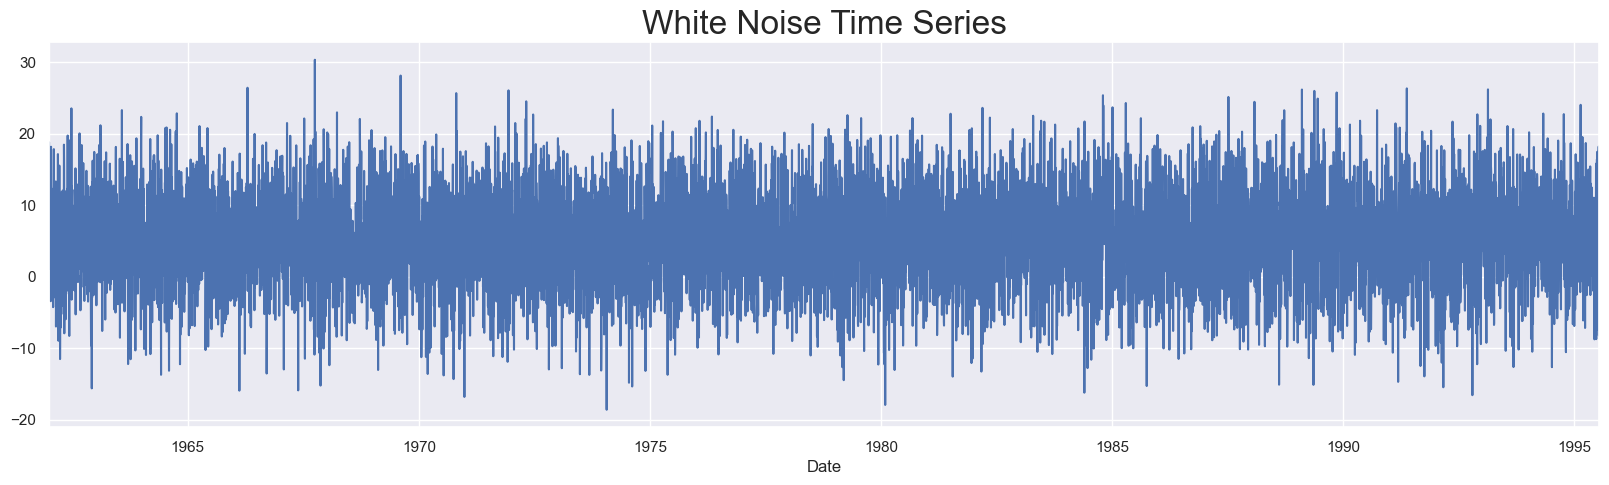

In [61]:
#Plotting White Noise
df_train.wn.plot(figsize=(20,5))
plt.title("White Noise Time Series", size=24)
plt.show()

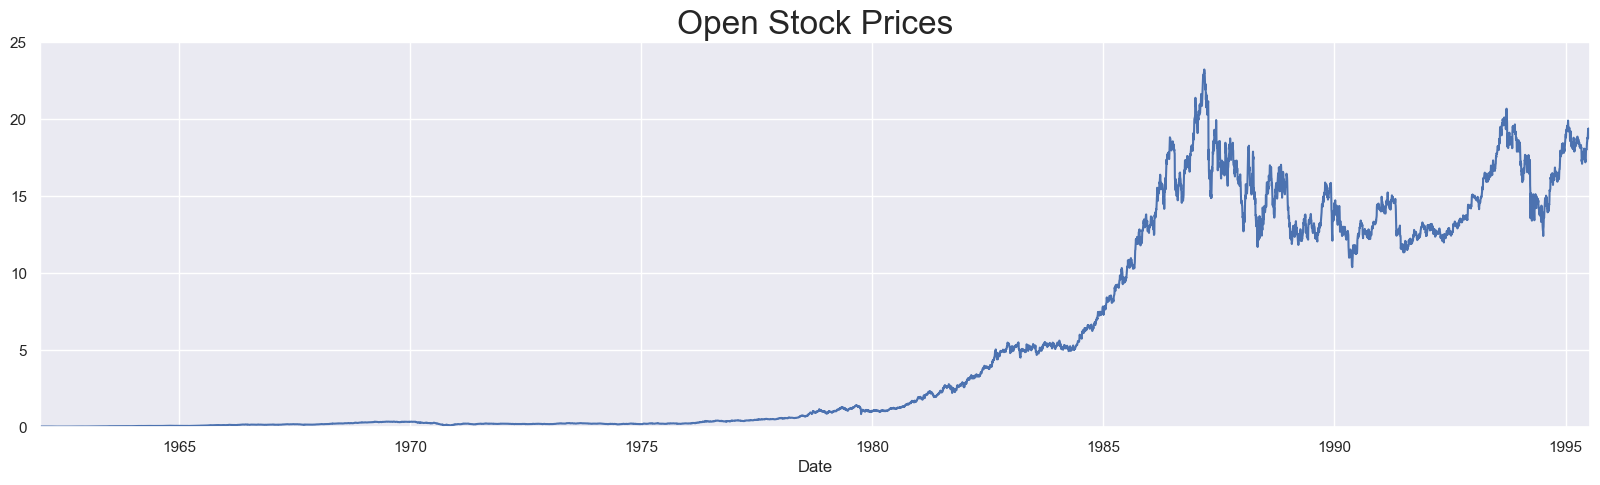

In [62]:
df_train.Open.plot(figsize=(20,5))
plt.title("Open Stock Prices", size=24)
plt.ylim(0,25)
plt.show()

In [63]:
#Creating a Random Walk Time Series

df_train['rw'] = df_train.Close

C:\Users\Ryan Abe Cortez\AppData\Local\Temp\ipykernel_5216\1553920421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['rw'] = df_train.Close


In [65]:
df_train.head()

,Open,High,Low,Close,Volume,wn,rw
Date,,,,,,,
1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,18.817166,0.050016
1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,1.722311,0.048902
1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,11.933342,0.049273
1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,7.586033,0.048159
1962-01-08,0.048530,0.049459,0.048035,0.048778,1612800,8.798849,0.048778


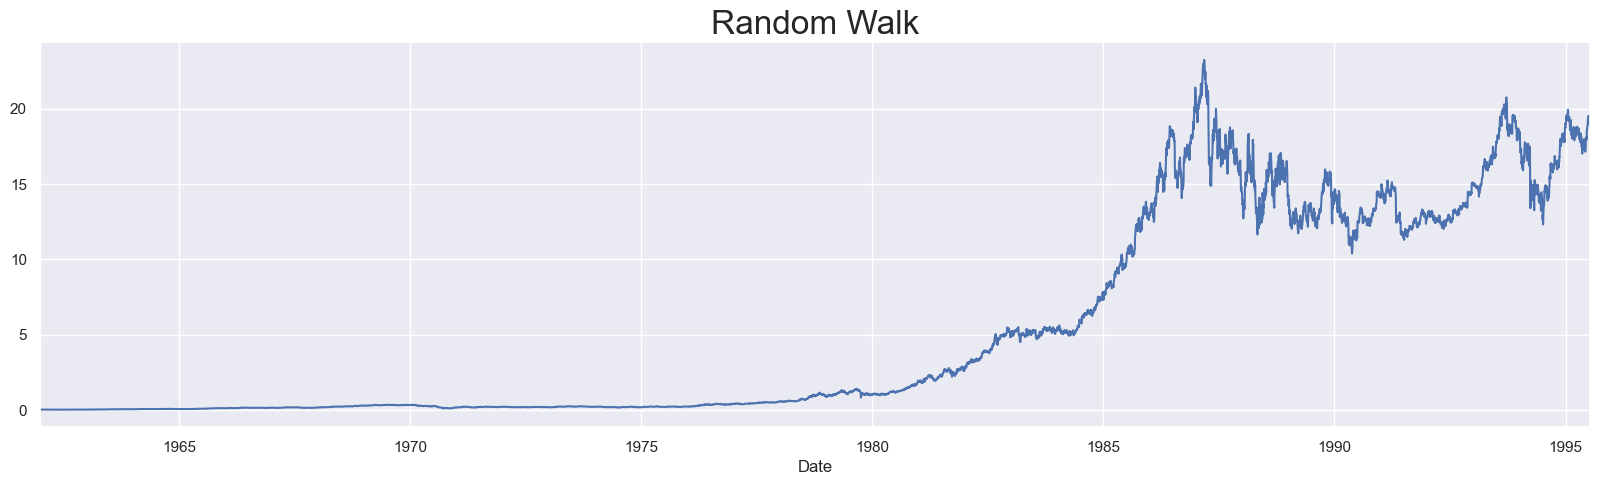

In [66]:
df_train.rw.plot(figsize=(20,5))
plt.title("Random Walk", size=24)
plt.show()

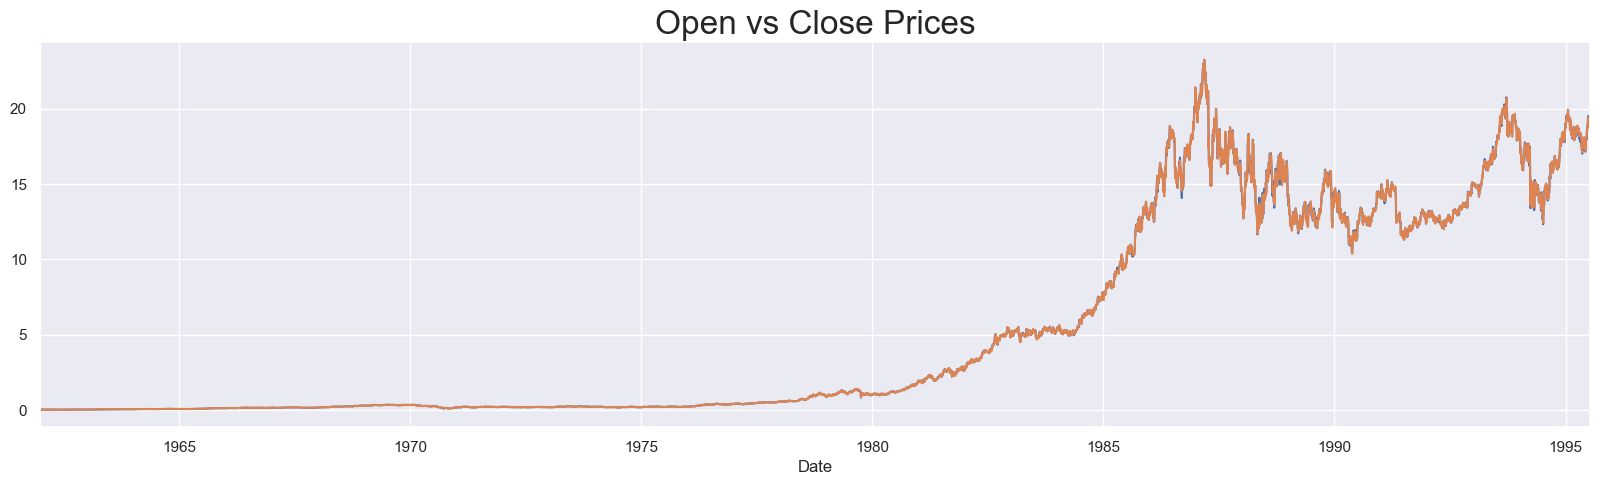

In [67]:
df_train.rw.plot(figsize=(20,5))
df_train.Open.plot()
plt.title("Open vs Close Prices", size=24)
plt.show()

In [68]:
#Stationarity
#Determining Weak Form Stationarity

#Dickey-Fuller Test: Null Hypothesis - Non-Stationarity, Alternative - Stationarity
sts.adfuller(df_train.Open)

(0.02440003394237612,
 0.96050403319941,
 33,
 8715,
 {'1%': -3.4311005711015787,
  '5%': -2.86187170239314,
  '10%': -2.566946560220062},
 -7750.92196792936)

In [69]:
sts.adfuller(df_train.wn)

(-91.94856332607112,
 0.0,
 0,
 8748,
 {'1%': -3.4310977388976402,
  '5%': -2.861870450905299,
  '10%': -2.566945894044578},
 57782.2295920301)

In [70]:
sts.adfuller(df_train.rw)

(0.010932024543379257,
 0.9594268733802703,
 34,
 8714,
 {'1%': -3.431100657260906,
  '5%': -2.8618717404650087,
  '10%': -2.5669465804859803},
 -7349.747690429371)

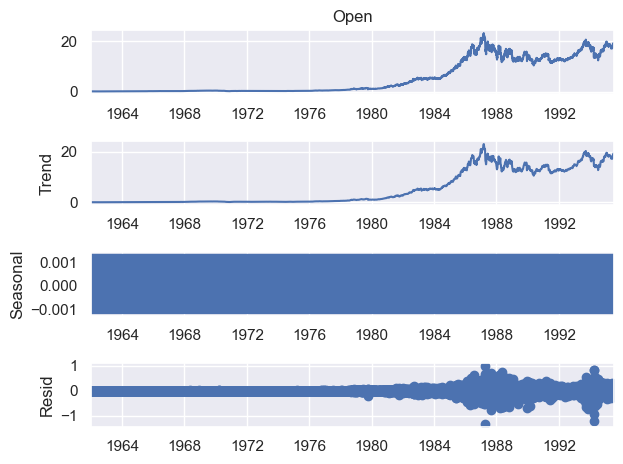

In [73]:
#Seasonality

#Additive Naive Decomposition
s_dec_additive = seasonal_decompose(df_train.Open, model="additive")
s_dec_additive.plot()
plt.show()

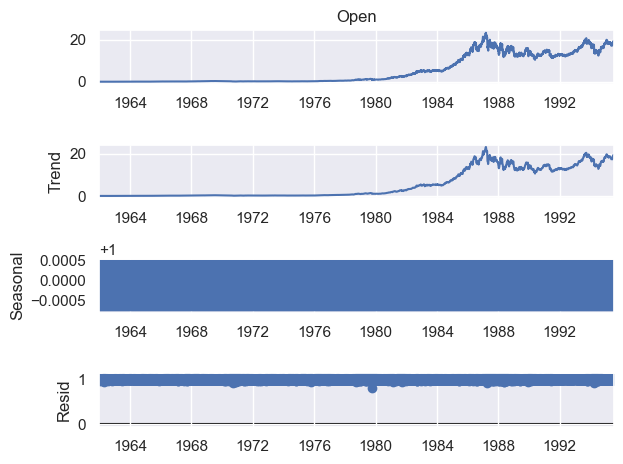

In [74]:
#Multiplicative Naaive Decomposition

s_dec_multiplicative = seasonal_decompose(df_train.Open, model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

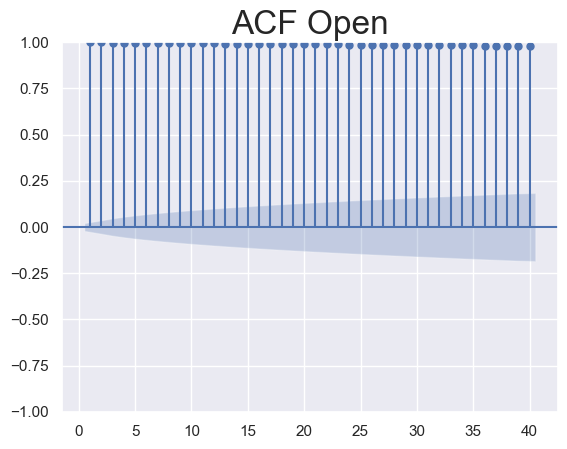

In [75]:
#Correlation

#Autocorrelation Function (ACF) - 40 lags (last 40 periods before current)
sgt.plot_acf(df_train.Open, lags=40, zero=False)
plt.title("ACF Open", size=24)
plt.show()

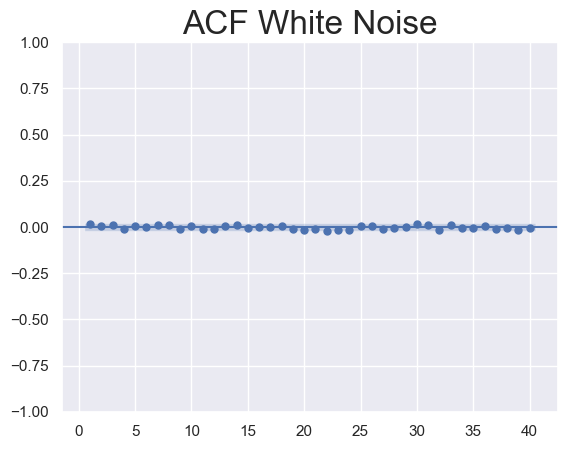

In [81]:
sgt.plot_acf(df_train.wn, lags=40, zero=False)
plt.title("ACF White Noise", size=24)
plt.show()

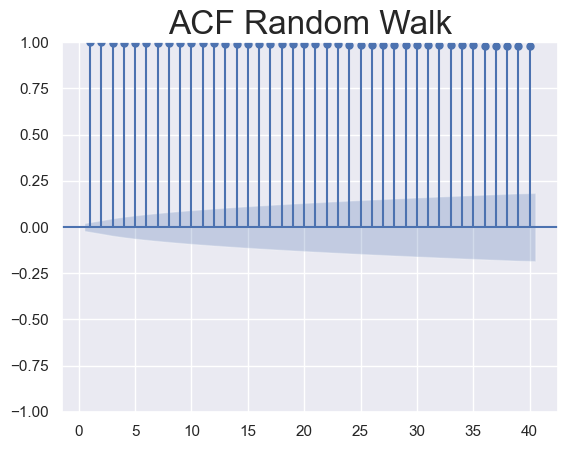

In [82]:
sgt.plot_acf(df_train.rw, lags=40, zero=False)
plt.title("ACF Random Walk", size=24)
plt.show()

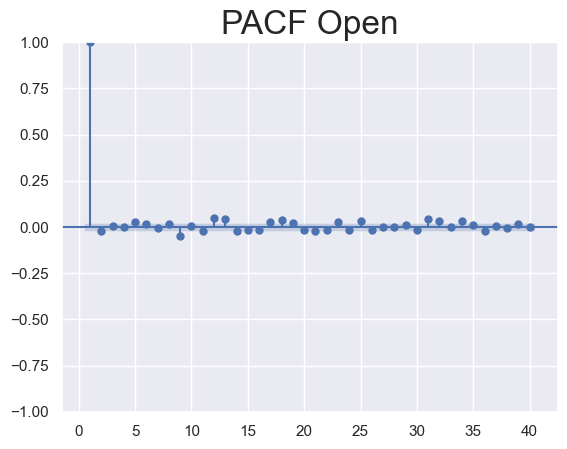

In [83]:
#Partial Autocorrelation Function

sgt.plot_pacf(df_train.Open, lags=40, zero=False, method=('ols'))
plt.title("PACF Open", size=24)
plt.show()

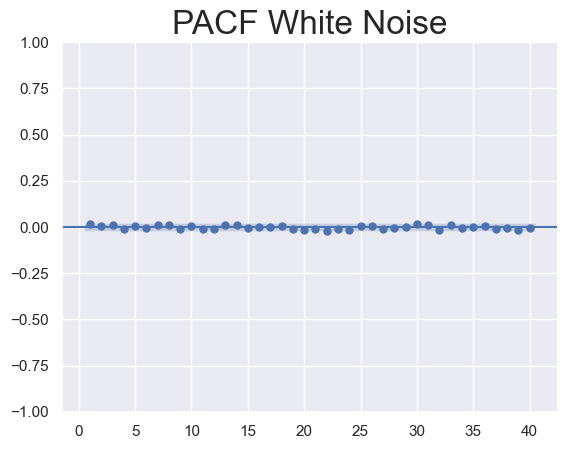

In [84]:
sgt.plot_pacf(df_train.wn, lags=40, zero=False, method=('ols'))
plt.title("PACF White Noise", size=24)
plt.show()

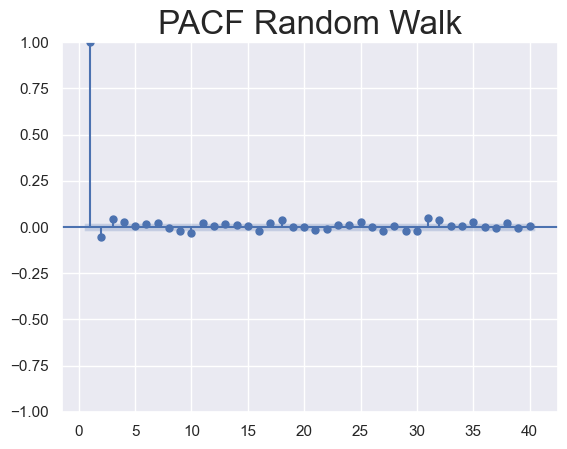

In [85]:
sgt.plot_pacf(df_train.rw, lags=40, zero=False, method=('ols'))
plt.title("PACF Random Walk", size=24)
plt.show()